IMDB Popular Movies 2000-2025
==
# 1. Import and Clean Data
> * Source: [IMDb Popular Movies with TMDb Enrichment](https://www.kaggle.com/datasets/arezazare/imdb-popular-movies-with-tmdb-enrichment)
> * Format: csv
> * Top 5000 movies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import kagglehub

# Download latest version
# path = kagglehub.dataset_download("arezazare/imdb-popular-movies-with-tmdb-enrichment")
# print("Path to dataset files:", path)

In [2]:
df = pd.read_csv("movies_enriched_5k.csv")
print(df.sample(5))

        IMDb_ID                         Title                 originalTitle  \
3893  tt0390221           Maria Full of Grace           Maria Full of Grace   
3589  tt0242193                         Bully                         Bully   
1121  tt0458481  Sin City: A Dame to Kill For  Sin City: A Dame to Kill For   
1992  tt6587046         The Boy and the Heron      Kimitachi wa dô ikiru ka   
3467  tt2515034                    The Gunman                    The Gunman   

      isAdult    Year  Runtime                     Genres  Rating   Votes  \
3893        0  2004.0    101.0                Crime,Drama     7.4   36933   
3589        0  2001.0    108.0      Biography,Crime,Drama     6.9   41983   
1121        0  2014.0    102.0      Action,Crime,Thriller     6.5  175045   
1992        0  2023.0    124.0  Adventure,Animation,Drama     7.4   96511   
3467        0  2015.0    115.0       Action,Crime,Mystery     5.8   44280   

                            Director  ...  \
3893             

In [3]:
df.describe(include="all")

,IMDb_ID,Title,originalTitle,isAdult,Year,Runtime,Genres,Rating,Votes,Director,...,Actors,Plot,Budget,Revenue,Popularity,Tagline,TMDb_ID,Country,Languages,Poster_URL
count,5000,5000,5000,5000.0,5000.000000,4999.000000,5000,5000.000000,5.000000e+03,5000,...,4933,4993,5.000000e+03,5.000000e+03,5000.000000,4461,4.995000e+03,5000,4998,4990
unique,5000,4938,4959,NaN,NaN,NaN,336,NaN,NaN,2324,...,4848,4980,NaN,NaN,NaN,4417,NaN,659,724,4977
top,tt0418773,Heist,Drishyam,NaN,NaN,NaN,"Comedy,Drama,Romance",NaN,NaN,Steven Soderbergh,...,"John Leguizamo, Denis Leary, Ray Romano",FBI agent Malcolm Turner and his 17-year-old s...,NaN,NaN,NaN,Be careful what you wish for.,NaN,United States of America,English,https://image.tmdb.org/t/p/w500/n1GSxFcDaZ6lMV...
freq,1,2,2,NaN,NaN,NaN,212,NaN,NaN,22,...,5,2,NaN,NaN,NaN,3,NaN,2423,2890,2
mean,NaN,NaN,NaN,0.0,2012.487800,112.065013,NaN,6.561480,1.435681e+05,NaN,...,NaN,NaN,3.590562e+07,1.042537e+08,6.871928,NaN,2.531302e+05,NaN,NaN,NaN
std,NaN,NaN,NaN,0.0,6.832129,21.101272,NaN,0.972934,2.032348e+05,NaN,...,NaN,NaN,5.026917e+07,2.031007e+08,20.718298,NaN,2.966768e+05,NaN,NaN,NaN
min,NaN,NaN,NaN,0.0,2000.000000,46.000000,NaN,1.000000,2.376600e+04,NaN,...,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,NaN,1.200000e+01,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.0,2007.000000,97.000000,NaN,6.000000,3.947300e+04,NaN,...,NaN,NaN,2.000000e+06,2.782867e+06,2.105825,NaN,1.142500e+04,NaN,NaN,NaN
50%,NaN,NaN,NaN,0.0,2013.000000,108.000000,NaN,6.600000,7.027100e+04,NaN,...,NaN,NaN,1.800000e+07,3.100000e+07,3.382850,NaN,9.986100e+04,NaN,NaN,NaN
75%,NaN,NaN,NaN,0.0,2018.000000,122.000000,NaN,7.200000,1.565050e+05,NaN,...,NaN,NaN,4.700000e+07,1.086685e+08,5.951875,NaN,4.301560e+05,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IMDb_ID        5000 non-null   object 
 1   Title          5000 non-null   object 
 2   originalTitle  5000 non-null   object 
 3   isAdult        5000 non-null   int64  
 4   Year           5000 non-null   float64
 5   Runtime        4999 non-null   float64
 6   Genres         5000 non-null   object 
 7   Rating         5000 non-null   float64
 8   Votes          5000 non-null   int64  
 9   Director       5000 non-null   object 
 10  Writer         4971 non-null   object 
 11  Actors         4933 non-null   object 
 12  Plot           4993 non-null   object 
 13  Budget         5000 non-null   int64  
 14  Revenue        5000 non-null   int64  
 15  Popularity     5000 non-null   float64
 16  Tagline        4461 non-null   object 
 17  TMDb_ID        4995 non-null   float64
 18  Country 

In [5]:
df.isAdult.value_counts()

isAdult
0    5000
Name: count, dtype: int64

In [6]:
df = df[["IMDb_ID", "Title", "Year", "Runtime", "Genres", "Rating", "Votes", "Budget", "Revenue", "Popularity"]]

In [7]:
df = df.astype({'Year': 'int', 'Budget': 'int', 'Revenue': 'int'})

In [8]:
df.Year = df.Year.replace(0.0, np.nan)
df.Runtime = df.Runtime.replace(0.0, np.nan)
df.Rating = df.Rating.replace(0.0, np.nan)
df.Votes = df.Votes.replace(0.0, np.nan)
df.Runtime = df.Runtime.replace(0.0, np.nan)
df.Popularity = df.Popularity.replace(0.0, np.nan)

# 2. Compare Genres to Profit
> * Calculate profit.
> * Split genres into multiple rows.

In [9]:
df["Profit"] = df.Revenue - df.Budget

In [10]:
df = df.assign(Genres=df['Genres'].str.split(','))
print(df.head())
df = df.explode('Genres').reset_index()
print(df.head())

     IMDb_ID                                              Title  Year  \
0  tt0468569                                    The Dark Knight  2008   
1  tt1375666                                          Inception  2010   
2  tt0816692                                       Interstellar  2014   
3  tt0120737  The Lord of the Rings: The Fellowship of the Ring  2001   
4  tt0167260      The Lord of the Rings: The Return of the King  2003   

   Runtime                       Genres  Rating    Votes     Budget  \
0    152.0       [Action, Crime, Drama]     9.0  3026849  185000000   
1    148.0  [Action, Adventure, Sci-Fi]     8.8  2689250  160000000   
2    169.0   [Adventure, Drama, Sci-Fi]     8.7  2351408  165000000   
3    178.0  [Adventure, Drama, Fantasy]     8.9  2112326   93000000   
4    201.0  [Adventure, Drama, Fantasy]     9.0  2082262   94000000   

      Revenue  Popularity      Profit  
0  1004558444     26.6430   819558444  
1   839030630     25.3304   679030630  
2   746606706 

In [11]:
print(df.Genres.value_counts())
f"Total Genres: {df.Genres.nunique()}"

Genres
Drama          2690
Comedy         1743
Action         1468
Adventure      1021
Crime          1019
Thriller        904
Romance         748
Horror          664
Mystery         642
Biography       421
Fantasy         398
Sci-Fi          389
Animation       293
Family          226
History         182
Music           130
Sport           107
Documentary      77
War              70
Musical          48
Western          16
News              2
Name: count, dtype: int64


'Total Genres: 22'

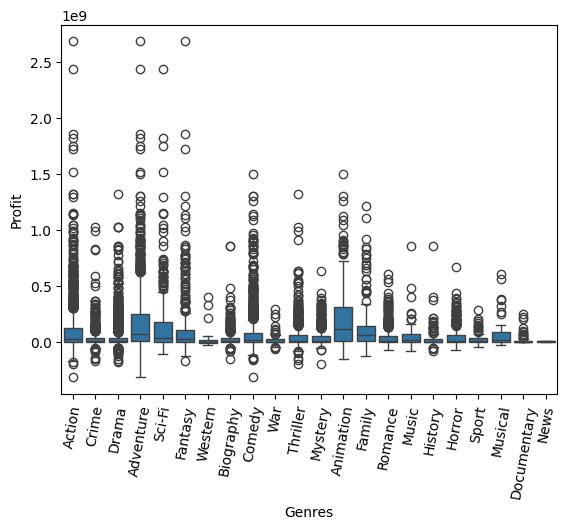

<Figure size 640x480 with 0 Axes>

In [12]:
sns.boxplot(data = df[["Genres", "Profit"]], x='Genres', y='Profit')
plt.tick_params(axis='x', labelrotation=80)
plt.show()
plt.clf()

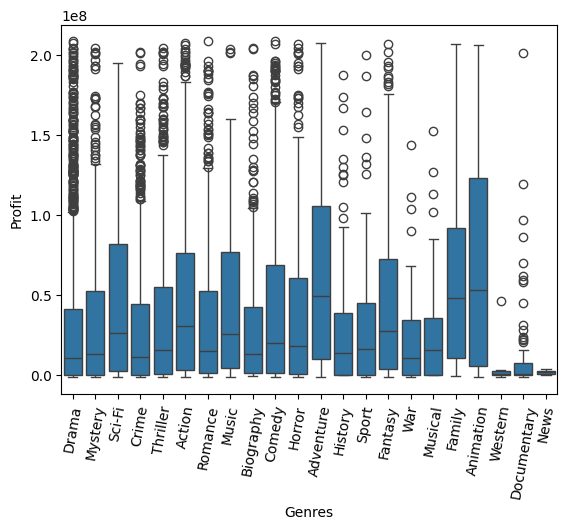

<Figure size 640x480 with 0 Axes>

In [13]:
# Filter out top 20% and bottom 10%
sns.boxplot(data = df[["Genres", "Profit"]][((df.Profit > df.Profit.quantile(0.20)) & (df.Profit < df.Profit.quantile(0.90)))],
            x='Genres',
            y='Profit')
plt.tick_params(axis='x', labelrotation=80)
plt.show()
plt.clf()

* Median and IQR indicates a family friendly action adventure animation will tend to do well
    * IQR indicates low risk compared to all categories, except possibly musicals

## 2.1 Calculate Risk of each Genre
> * Note: most popular movies, so risk should be low...
> * Probability of making a 10% return?

In [14]:
# Meand and Standard Deviation for Population
genre_profit = df.groupby('Genres')["Profit"].agg(['mean', 'std', 'count']).reset_index()
# Calculate Sampling Error. Sample mean approximates population mean.
genre_profit['sample_err'] = genre_profit['std'] / genre_profit['count'].pow(0.5)
genre_budget = df.groupby('Genres')["Budget"].mean()
genre_budget.name = "budget"
genre_profit = genre_profit.merge(genre_budget, on="Genres")
# Probability of making at least a 10% return
genre_profit["perc_prob_10"] = genre_profit.apply(lambda row: (1 - stats.norm.cdf(row.budget * 0.1, row['mean'], row.sample_err)) * 100.0, axis = 1)
print(genre_profit)

         Genres          mean           std  count    sample_err  \
0        Action  1.070190e+08  2.346555e+08   1468  6.124459e+06   
1     Adventure  1.852907e+08  2.988767e+08   1021  9.353610e+06   
2     Animation  2.053196e+08  2.742807e+08    293  1.602365e+07   
3     Biography  3.292356e+07  8.857453e+07    421  4.316858e+06   
4        Comedy  7.037629e+07  1.564168e+08   1743  3.746578e+06   
5         Crime  2.949095e+07  8.661019e+07   1019  2.713201e+06   
6   Documentary  1.956415e+07  4.759137e+07     77  5.423540e+06   
7         Drama  3.540835e+07  9.861724e+07   2690  1.901414e+06   
8        Family  1.241277e+08  2.060737e+08    226  1.370782e+07   
9       Fantasy  1.292618e+08  2.883017e+08    398  1.445126e+07   
10      History  2.355845e+07  8.701750e+07    182  6.450166e+06   
11       Horror  3.969793e+07  7.270623e+07    664  2.821549e+06   
12        Music  5.105689e+07  1.051871e+08    130  9.225519e+06   
13      Musical  7.568358e+07  1.465971e+08     

> * Even in the top 5000, news and westerns run a noteable risk of not returning at least 10%.